# Analyze Q and V from Bellman Equation

In [2]:
import pickle
import pprint

import traceback
from rich.console import Console
console = Console()


def log(*strings):
    frame = traceback.extract_stack()[-2]
    line_number = frame.lineno
    function_name = frame.name
    message = " ".join([str(string) for string in strings])
    console.print(f"[bold pink1]{function_name}[/bold pink1] (line {line_number}): [bold]{message}[/bold]")

In [3]:
from collections import defaultdict
import time

# TODO: automate action list
# actions = ["Restraint Ring", "Phantom Blow", "Ready to Die", "Karma Fury", "Blade Tornado"]

V = defaultdict(float)
Q = defaultdict(dict)

def save_QV(Q, V):
    saving_begin = time.time()

    with open(f'Q.pickle', 'wb') as f:
        pickle.dump(Q, f, pickle.HIGHEST_PROTOCOL)
    
    with open(f'V.pickle', 'wb') as f:
        pickle.dump(V, f, pickle.HIGHEST_PROTOCOL)
    
    saving_end = time.time()
    print("Table Saving:", saving_end - saving_begin, "seconds")


def is_converged(V, V_new, epsilon = 0.0001):
    # 0.01 = 1% error tolerance
    for state in V:
        if abs(V[state] - V_new[state]) > epsilon * V_new[state]:
            return False
    return True

In [4]:
with open('../raw_data_test.pickle', 'rb') as f:
    raw_data = pickle.load(f)

with open('../init_state_test.pickle', 'rb') as f:
    init_state = pickle.load(f)

state = init_state
q_value = defaultdict(dict)
gamma = 0.9999

while True:
    V_new = defaultdict(float)
    for state in raw_data:
        for action in raw_data[state]:
            reward, next_state = raw_data[state][action]
            # No transition exists in current environment (재사용 대기시간 초기화 미적용)
            Q[state][action] = reward + gamma * V[next_state]
        V_new[state] = max(Q[state].values())
    if is_converged(V, V_new):
        break
    V = V_new

save_QV(Q, V)

Table Saving: 0.0052874088287353516 seconds


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

actions = Q[init_state].keys()

tbl = defaultdict(dict)

state = init_state
while True:
    values = np.array(list(Q[state].values()))
    if not values.any():
        break
    index = np.argmax(values)
    keys = list(Q[state].keys())
    next_action = keys[index]
    log(next_action, state[-1], Q[state])
    tbl[state[-1]] = Q[state]
    reward, state = raw_data[state][next_action]


<module> (line 18): Ready to Die 10.0 {'Restraint Ring': 757171572893.026, 'Ready to Die': 770297474048.3164, 
'Karma Fury': 659133991403.3992, 'Phantom Blow': 753856027059.2644, 'Single Stroke Ⅰ': 765065179681.9058, 'Blade 
Tornado': 660107314474.8391, 'Blade Storm': 732113470984.2013}

<module> (line 18): Restraint Ring 9.4 {'Phantom Blow': 644708722413.1984, 'Single Stroke Ⅰ': 765141693851.2909, 
'Karma Fury': 641729959799.3668, 'Blade Tornado': 638348503676.12, 'Restraint Ring': 770374511499.4663}

<module> (line 18): Single Stroke Ⅰ 9.13 {'Blade Tornado': 750117081225.6311, 'Single Stroke Ⅰ': 770451556655.1318}

<module> (line 18): Blade Tornado 9.13 {'Blade Tornado': 770528609516.0835, 'Karma Fury': 734861876404.0775}

<module> (line 18): Phantom Blow 8.53 {'Phantom Blow': 542861562136.2971, 'Karma Fury': 507196725146.34344}

<module> (line 18): Phantom Blow 7.96 {'Phantom Blow': 525693060381.33527}

<module> (line 18): Blade Storm 7.39 {'Blade Storm': 508522841604.4957}

<module> (line 18): stop_keydown 7.19 {'stop_keydown': 441885783307.8265, 'Blade Storm': 438327969768.14905}

<module> (line 18): Blade Tornado 6.83 {'Blade Tornado': 441929976305.45703}

<module> (line 18): Phantom Blow 6.23 {'Phantom Blow': 214230065776.03464}

<module> (line 18): Phantom Blow 5.66 {'Phantom Blow': 194764342007.23535}

<module> (line 18): Phantom Blow 5.09 {'Phantom Blow': 175296671471.38248}

<module> (line 18): Phantom Blow 4.52 {'Phantom Blow': 155827053973.77985}

<module> (line 18): Phantom Blow 3.95 {'Phantom Blow': 136355489319.71184}

<module> (line 18): Phantom Blow 3.38 {'Phantom Blow': 116881977314.44328}

<module> (line 18): Phantom Blow 2.81 {'Phantom Blow': 97406517763.2196}

<module> (line 18): Phantom Blow 2.24 {'Phantom Blow': 77929110471.26672}

<module> (line 18): Phantom Blow 1.67 {'Phantom Blow': 58449755243.79111}

<module> (line 18): Phantom Blow 1.1 {'Phantom Blow': 38968451885.979706}

<module> (line 18): Phantom Blow 0.53 {'Phantom Blow': 19485200203.0}

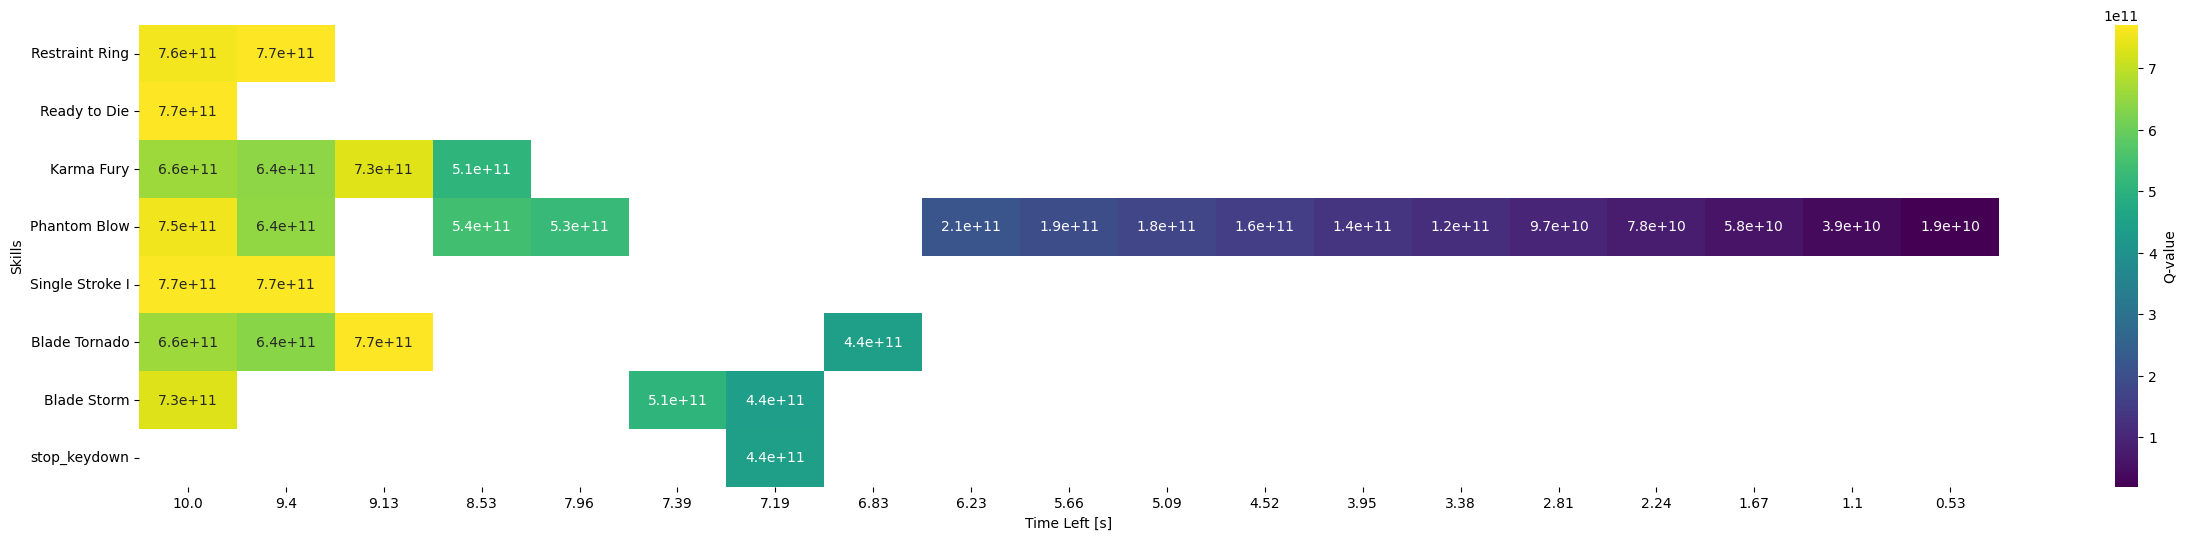

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the Q-table into a DataFrame
df = pd.DataFrame(tbl)

# Create a new figure with a specified size (width=10, height=6)
plt.figure(figsize=(30, 6))

# Create a heatmap
ax = sns.heatmap(df, annot=True, cmap='viridis')
ax.collections[0].colorbar.set_label("Q-value")

# Add labels
plt.xlabel('Time Left [s]')
plt.ylabel('Skills')

# Show the plot
plt.show()

In [7]:
Q[init_state]

{'Restraint Ring': 757171572893.026,
 'Ready to Die': 770297474048.3164,
 'Karma Fury': 659133991403.3992,
 'Phantom Blow': 753856027059.2644,
 'Single Stroke Ⅰ': 765065179681.9058,
 'Blade Tornado': 660107314474.8391,
 'Blade Storm': 732113470984.2013}

In [8]:
reward, next_state = raw_data[init_state]["Restraint Ring"]
Q[next_state]

{'Karma Fury': 622084840993.1233,
 'Phantom Blow': 755696933979.8528,
 'Ready to Die': 757247297622.7883,
 'Blade Storm': 755570999680.5974}